In [1]:
import os
os.chdir('/g/data/xv83/np1383/src_CAFE60_eqpac_analysis_code/')

In [2]:
# %load C60_jupyter_imports.py
%load_ext autoreload
%autoreload 2

import xarray as xr
import numpy as np
from dask.distributed import Client
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
import xesmf as xe
from scipy.stats import linregress
import os
import requests
# Lets import our functions. There are no tests here. Stored separately so as to not make a mess.
# Make sure in right dir first

os.chdir('/g/data/xv83/np1383/src_CAFE60_eqpac_analysis_code/')

In [3]:
pwd

'/g/data4/xv83/np1383/src_CAFE60_eqpac_analysis_code'

In [4]:
from C60_model_cutting_functions import CAFE60_eqpac_cutter

This scipt will load a Dask Scheduler, and then call the CAFE60 model cutting functions for different varaibles. Those functions are stored in `a_model_cutting_functions.py`. This should be easy enough to make a new variable cutout by just copying the function templates.

Current variables bing cutout include:

sst
stf10 (co2 flux)
phy (phytoplankton?)
surface_zoo
surface_dic
stf10 (Natural + Anth CO2?)
stf03 (Not sure which is which)
stf07 (Not sure which is which).
pprod_gross_2d
export_prod


Easy to add others and make a bit more modular. Will need some work to get the st_ocean depths out but its kind of there. 

In [5]:
# Set up the Local Dask Cluster
# from dask.distributed import Client, LocalCluster,Scheduler
# from dask_jobqueue import SLURMCluster
# cluster = LocalCluster()
# client = Client(cluster)
# print(client)

In [6]:
# Set up the remote dask cluster
from dask.distributed import Client,Scheduler
from dask_jobqueue import SLURMCluster
cluster = SLURMCluster(cores=2,memory="16GB")
client = Client(cluster)
cluster.scale(cores=8)
#cluster.adapt(minimum=2, maximum=16)
client
##

Connection method: Cluster object,Cluster type: dask_jobqueue.SLURMCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 0
Total threads: 0,Total memory: 0 B
Comm: tcp://10.0.128.135:39703,Workers: 0
Dashboard: /proxy/8787/status,Total threads: 0
Started: Just now,Total memory: 0 B


In [8]:
#cluster.scale(cores=2)

In [5]:
client

Client Scheduler: tcp://127.0.0.1:46805 Dashboard: /proxy/38447/status,Cluster Workers: 2 Cores: 2 Memory: 5.62 GiB


In [12]:
!squeue -u np1383

             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
              7327       vdi sys/dash   np1383  R    1:13:40      1 ood-vn8


In [7]:
# Check the model data works first

# modeldata_bgc=xr.open_zarr('/g/data/xv83/dcfp/CAFE60v1/ocean_bgc_month.zarr.zip',consolidated=True)
# modeldata_ocean=xr.open_zarr('/g/data/xv83/dcfp/CAFE60v1/ocean_month.zarr.zip',consolidated=True)
# modeldata_atmos=xr.open_zarr('/g/data/xv83/dcfp/CAFE60v1/atmos_isobaric_month.zarr.zip',consolidated=True)

Starting on Variable: sst
Begin Dataset Size: 29.85984 GB
renamed lons
Calculating Ens Mean
Saving Mean Ens Dataset Size: 0.196992 GB


/g/data4/xv83/np1383/src_CAFE60_eqpac_analysis_code/a_model_cutting_functions.py:258: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  modeldata['time']=np.array(modeldata.indexes['time'].to_datetimeindex(), dtype='datetime64[M]')


Saved to: /g/data/xv83/np1383/processed_data/cafe/global/sst_ensmean_1982.nc
Saved to: /g/data/xv83/np1383/processed_data/cafe/global/sst_ensstd_1982.nc
Calculating Trend
plotting


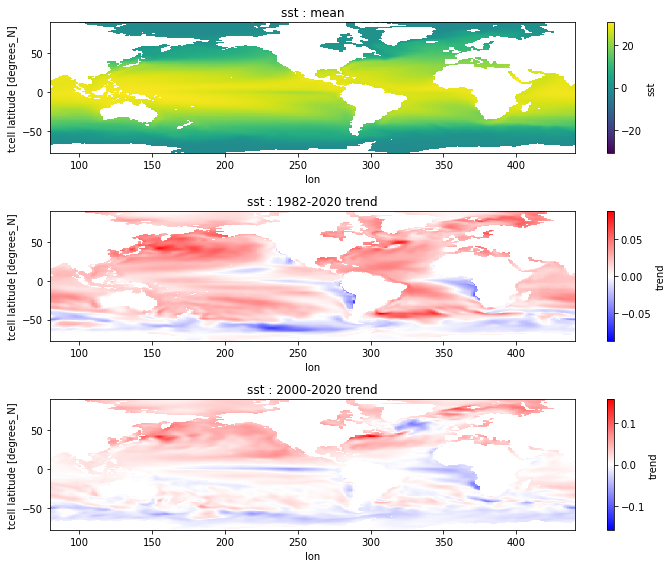

In [6]:
#Process CAFE SST for equatorial Pacific
CAFE60_eqpac_cutter(modelType='physics',
                        variable='sst',
                        cut_eqpac=False,
                        save_all_data=False,
                        trend=True,
                        force=True)

Starting on Variable: sst
Begin Dataset Size: 29.85984 GB
renamed lons


/g/data4/xv83/np1383/src_CAFE60_eqpac_analysis_code/C60_model_cutting_functions.py:177: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  modeldata['time']=np.array(modeldata.indexes['time'].to_datetimeindex(), dtype='datetime64[M]')


Saving Dataset sst, size: 2.91723264 GB
saved to: /g/data/xv83/np1383/processed_data/cafe/eqpac/sst_ensmean_1982_all_ensembles.nc
Calculating Ens Mean
Saving Mean Ens Dataset Size: 0.03038784 GB
Saved to: /g/data/xv83/np1383/processed_data/cafe/eqpac/sst_ensmean_1982.nc
Saved to: /g/data/xv83/np1383/processed_data/cafe/eqpac/sst_ensstd_1982.nc
Calculating Trend
plotting


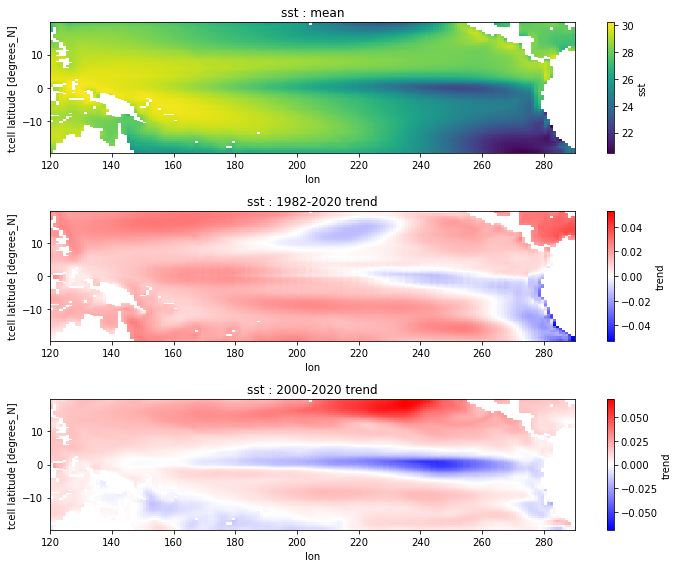

In [11]:
#Process CAFE SST for equatorial Pacific
CAFE60_eqpac_cutter(modelType='physics',
                        variable='sst',
                        cut_eqpac=True,
                        save_all_data=True,
                        trend=True,
                        force=True)

In [12]:
#cluster.scale(cores=8)
CAFE60_eqpac_cutter(modelType='BGC',
                        variable=['stf03','stf07','stf10'],
                        cut_eqpac=True,
                        save_all_data=True,
                        trend=True,
                        plot=False,
                        force=True)
#cluster.scale(cores=2)

Starting on Variable: stf03
Begin Dataset Size: 29.85984 GB
renamed lons
Saving Dataset stf03, size: 2.91723264 GB


/g/data4/xv83/np1383/src_CAFE60_eqpac_analysis_code/C60_model_cutting_functions.py:177: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  modeldata['time']=np.array(modeldata.indexes['time'].to_datetimeindex(), dtype='datetime64[M]')


saved to: /g/data/xv83/np1383/processed_data/cafe/eqpac/stf03_ensmean_1982_all_ensembles.nc
Calculating Ens Mean
Saving Mean Ens Dataset Size: 0.03038784 GB
Saved to: /g/data/xv83/np1383/processed_data/cafe/eqpac/stf03_ensmean_1982.nc
Saved to: /g/data/xv83/np1383/processed_data/cafe/eqpac/stf03_ensstd_1982.nc
Calculating Trend
Starting on Variable: stf07
Begin Dataset Size: 29.85984 GB
renamed lons
Saving Dataset stf07, size: 2.91723264 GB


/g/data4/xv83/np1383/src_CAFE60_eqpac_analysis_code/C60_model_cutting_functions.py:177: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  modeldata['time']=np.array(modeldata.indexes['time'].to_datetimeindex(), dtype='datetime64[M]')


saved to: /g/data/xv83/np1383/processed_data/cafe/eqpac/stf07_ensmean_1982_all_ensembles.nc
Calculating Ens Mean
Saving Mean Ens Dataset Size: 0.03038784 GB
Saved to: /g/data/xv83/np1383/processed_data/cafe/eqpac/stf07_ensmean_1982.nc
Saved to: /g/data/xv83/np1383/processed_data/cafe/eqpac/stf07_ensstd_1982.nc
Calculating Trend
Starting on Variable: stf10
Begin Dataset Size: 29.85984 GB
renamed lons
Saving Dataset stf10, size: 2.91723264 GB


/g/data4/xv83/np1383/src_CAFE60_eqpac_analysis_code/C60_model_cutting_functions.py:177: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  modeldata['time']=np.array(modeldata.indexes['time'].to_datetimeindex(), dtype='datetime64[M]')


saved to: /g/data/xv83/np1383/processed_data/cafe/eqpac/stf10_ensmean_1982_all_ensembles.nc
Calculating Ens Mean
Saving Mean Ens Dataset Size: 0.03038784 GB
Saved to: /g/data/xv83/np1383/processed_data/cafe/eqpac/stf10_ensmean_1982.nc
Saved to: /g/data/xv83/np1383/processed_data/cafe/eqpac/stf10_ensstd_1982.nc
Calculating Trend


In [ ]:
CAFE60_eqpac_cutter(modelType='BGC',
                        variable='surface_phy',
                        cut_eqpac=True,
                        save_all_data=False,
                        trend=True,
                        plot=False,
                        force=True)

Starting on Variable: surface_phy
Begin Dataset Size: 29.85984 GB
renamed lons
Failed no st_ocean variable available try again, doing nothing.
Calculating Ens Mean
Saving Mean Ens Dataset Size: 0.03038784 GB


/g/data4/xv83/np1383/src_CAFE60_eqpac_analysis_code/a_model_cutting_functions.py:258: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  modeldata['time']=np.array(modeldata.indexes['time'].to_datetimeindex(), dtype='datetime64[M]')


In [10]:
CAFE60_eqpac_cutter(modelType='BGC',
                        variable='phy',
                        cut_eqpac=True,
                        save_all_data=False,
                        trend=True,
                        plot=False,
                        force=True,
                        st_ocean=15)

Starting on Variable: phy
Begin Dataset Size: 1492.992 GB
renamed lons


/g/data4/xv83/np1383/src_CAFE60_eqpac_analysis_code/a_model_cutting_functions.py:258: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  modeldata['time']=np.array(modeldata.indexes['time'].to_datetimeindex(), dtype='datetime64[M]')


Calculating Ens Mean
Saving Mean Ens Dataset Size: 0.03038784 GB
Saved to: /g/data/xv83/np1383/processed_data/cafe/eqpac/phy_ensmean_1982_15m_.nc
Saved to: /g/data/xv83/np1383/processed_data/cafe/eqpac/phy_ensstd_1982_15m_.nc
Calculating Trend


Starting on Variable: surface_dic
Begin Dataset Size: 29.85984 GB
renamed lons
Calculating Ens Mean


/g/data4/xv83/np1383/src_CAFE60_eqpac_analysis_code/a_model_cutting_functions.py:258: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  modeldata['time']=np.array(modeldata.indexes['time'].to_datetimeindex(), dtype='datetime64[M]')


Saving Mean Ens Dataset Size: 0.03038784 GB
Saved to: /g/data/xv83/np1383/processed_data/cafe/eqpac/surface_dic_ensmean_1982.nc
Saved to: /g/data/xv83/np1383/processed_data/cafe/eqpac/surface_dic_ensstd_1982.nc
Calculating Trend
plotting


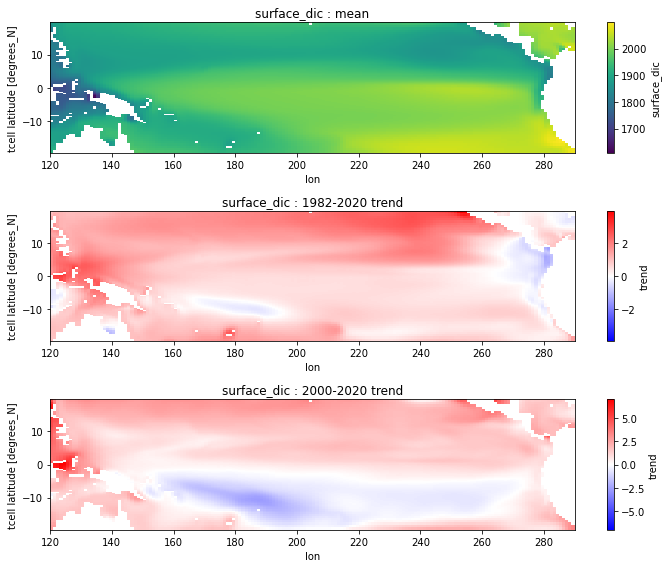

Starting on Variable: surface_zoo
Begin Dataset Size: 29.85984 GB
renamed lons
Calculating Ens Mean
Saving Mean Ens Dataset Size: 0.03038784 GB


/g/data4/xv83/np1383/src_CAFE60_eqpac_analysis_code/a_model_cutting_functions.py:258: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  modeldata['time']=np.array(modeldata.indexes['time'].to_datetimeindex(), dtype='datetime64[M]')


Saved to: /g/data/xv83/np1383/processed_data/cafe/eqpac/surface_zoo_ensmean_1982.nc
Saved to: /g/data/xv83/np1383/processed_data/cafe/eqpac/surface_zoo_ensstd_1982.nc
Calculating Trend
plotting


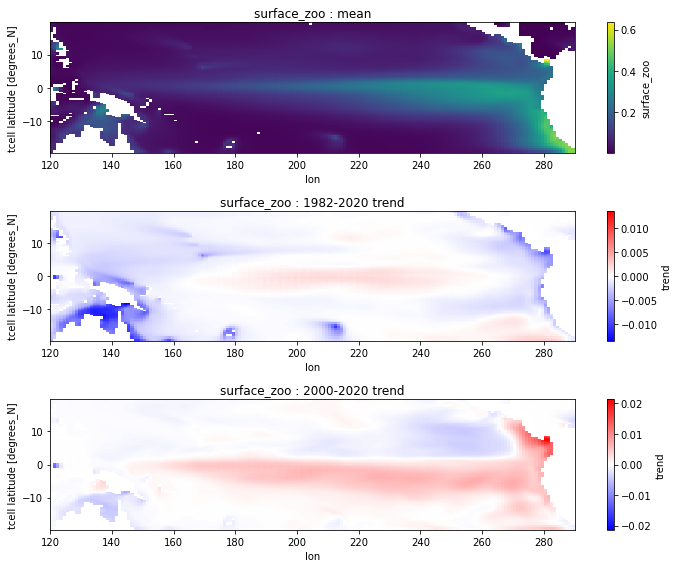

In [5]:
CAFE60_eqpac_cutter(modelType='BGC',
                        variable=['surface_dic','surface_zoo'],
                        cut_eqpac=True,
                        save_all_data=False,
                        trend=True,
                        plot=True,
                        force=True)

In [6]:
client

<Client: 'tcp://10.0.128.132:45181' processes=8 threads=8, memory=59.60 GiB>

Starting on Variable: pprod_gross_2d
Begin Dataset Size: 29.85984 GB
renamed lons
Calculating Ens Mean
Saving Mean Ens Dataset Size: 0.03038784 GB


/g/data4/xv83/np1383/src_CAFE60_eqpac_analysis_code/a_model_cutting_functions.py:258: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  modeldata['time']=np.array(modeldata.indexes['time'].to_datetimeindex(), dtype='datetime64[M]')


Saved to: /g/data/xv83/np1383/processed_data/cafe/eqpac/pprod_gross_2d_ensmean_1982.nc
Calculating Trend
1982 trend Dataset already exists /g/data/xv83/np1383/processed_data/cafe/eqpac/pprod_gross_2d_meantrends_1982.nc
2000 trend Dataset already exists: /g/data/xv83/np1383/processed_data/cafe/eqpac/pprod_gross_2d_meantrends_2000.nc
plotting


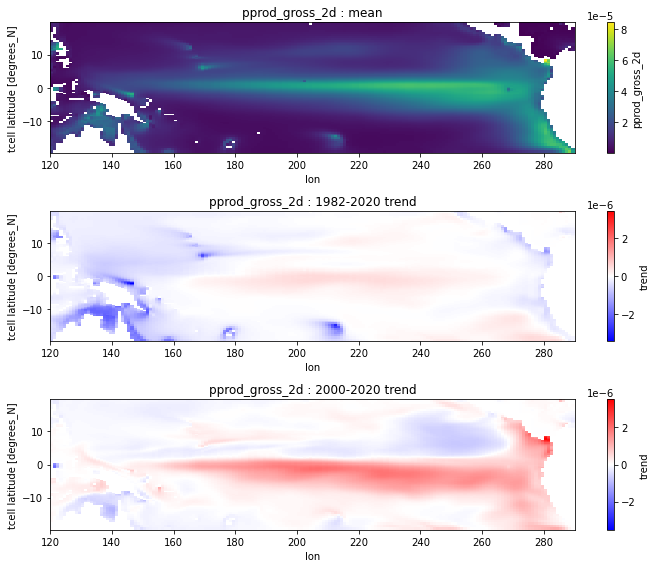

Starting on Variable: export_prod
Begin Dataset Size: 29.85984 GB
renamed lons
Calculating Ens Mean


/g/data4/xv83/np1383/src_CAFE60_eqpac_analysis_code/a_model_cutting_functions.py:258: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  modeldata['time']=np.array(modeldata.indexes['time'].to_datetimeindex(), dtype='datetime64[M]')


Mean Ens Dataset already exists: /g/data/xv83/np1383/processed_data/cafe/eqpac/export_prod_ensmean_1982.nc
Calculating Trend
1982 trend Dataset already exists /g/data/xv83/np1383/processed_data/cafe/eqpac/export_prod_meantrends_1982.nc
2000 trend Dataset already exists: /g/data/xv83/np1383/processed_data/cafe/eqpac/export_prod_meantrends_2000.nc
plotting


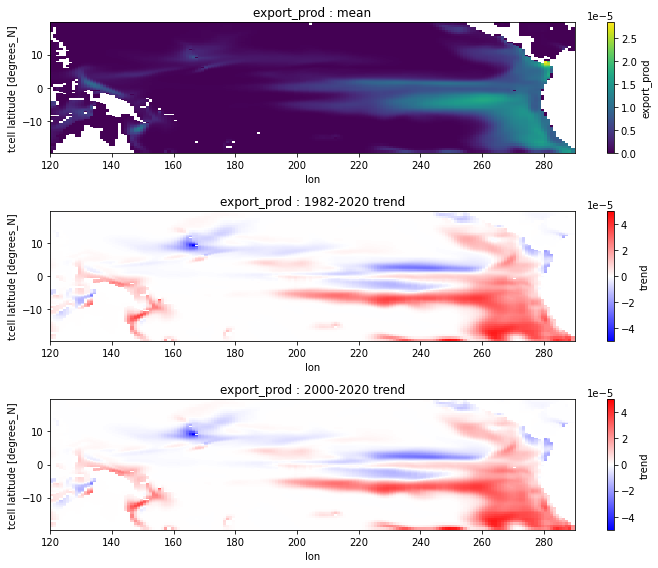

In [7]:
CAFE60_eqpac_cutter(modelType='BGC',
                        variable=['pprod_gross_2d','export_prod'],
                        cut_eqpac=True,
                        save_all_data=False,
                        trend=True,
                        plot=True,
                        force=False)

Starting on Variable: u_ref
Begin Dataset Size: 3.5831808 GB
vars probably already named
Calculating Ens Mean
Mean Ens Dataset already exists: /g/data/xv83/np1383/processed_data/cafe/eqpac/u_ref_ensmean_1982.nc
Calculating Trend
1982 trend Dataset already exists /g/data/xv83/np1383/processed_data/cafe/eqpac/u_ref_meantrends_1982.nc
2000 trend Dataset already exists: /g/data/xv83/np1383/processed_data/cafe/eqpac/u_ref_meantrends_2000.nc
plotting


/g/data4/xv83/np1383/src_CAFE60_eqpac_analysis_code/a_model_cutting_functions.py:258: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  modeldata['time']=np.array(modeldata.indexes['time'].to_datetimeindex(), dtype='datetime64[M]')


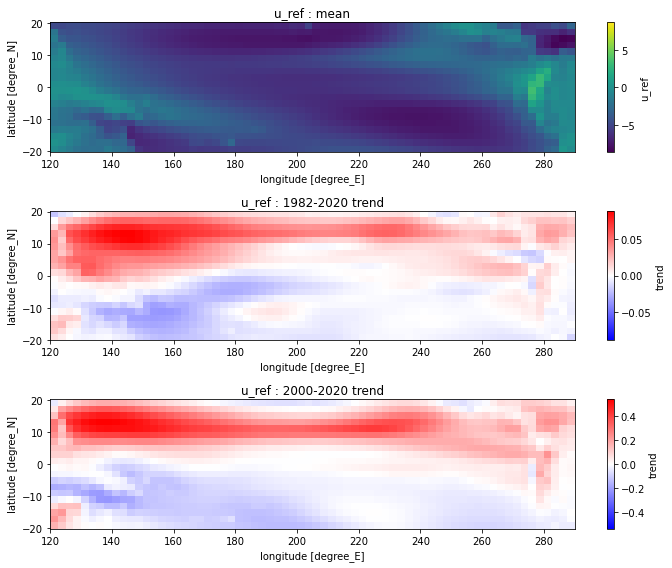

Starting on Variable: v_ref
Begin Dataset Size: 3.5831808 GB
vars probably already named
Calculating Ens Mean
Mean Ens Dataset already exists: /g/data/xv83/np1383/processed_data/cafe/eqpac/v_ref_ensmean_1982.nc
Calculating Trend


/g/data4/xv83/np1383/src_CAFE60_eqpac_analysis_code/a_model_cutting_functions.py:258: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  modeldata['time']=np.array(modeldata.indexes['time'].to_datetimeindex(), dtype='datetime64[M]')


plotting


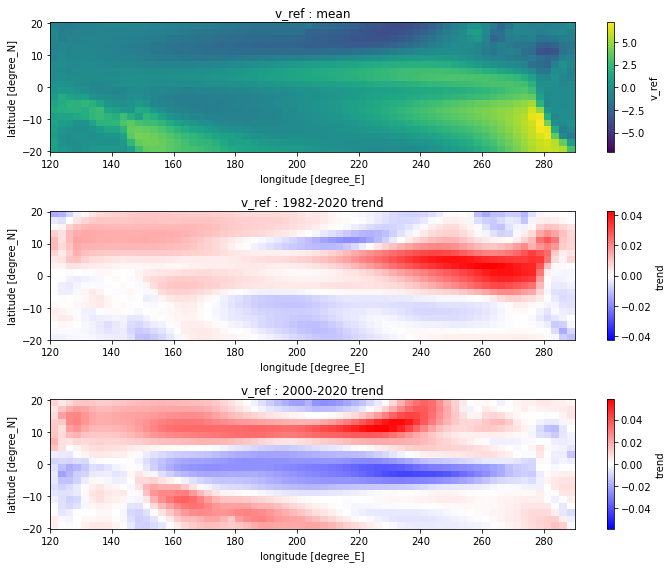

In [5]:
CAFE60_eqpac_cutter(modelType='atmos',
                        variable=['u_ref','v_ref'],
                        cut_eqpac=True,
                        save_all_data=False,
                        trend=True,
                        fix_long_coords=False,
                        plot=True,
                        force=False)

In [7]:
# Ok and Calculate and save the windspeed
u=xr.open_dataset('/g/data/xv83/np1383/processed_data/cafe/eqpac/u_ref_ensmean_1982.nc')
v=xr.open_dataset('/g/data/xv83/np1383/processed_data/cafe/eqpac/v_ref_ensmean_1982.nc')
ws=np.sqrt((u.u_ref**2)+(v.v_ref**2))
ws.to_netcdf('/g/data/xv83/np1383/processed_data/cafe/eqpac/ws_ensmean_1982.nc')